# Hoja de trabajo No.2: Análisis Exploratorio y Regresiones

## Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

## Importar datos

In [2]:
datos = pd.read_csv('baseball-2016.csv')

## Lectura de datos

In [3]:
datos.head(150)

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,boxscore_url,date,field_type,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,other_info_string,start_time,venue
0,"40,030']",New York Mets,1,7,3,https://www.baseball-reference.com/boxes/KCA/K...,"Sunday, April 3, 2016",NaN,: 3:13,"Night Game, on grass",Kansas City Royals,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:38 p.m. Local,: Kauffman Stadium
1,"21,621']",Philadelphia Phillies,0,5,2,https://www.baseball-reference.com/boxes/CIN/C...,"Wednesday, April 6, 2016",NaN,: 2:23,"Night Game, on grass",Cincinnati Reds,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:11 p.m. Local,: Great American Ball Park
2,"12,622']",Minnesota Twins,0,5,2,https://www.baseball-reference.com/boxes/BAL/B...,"Wednesday, April 6, 2016",NaN,: 3:11,"Night Game, on grass",Baltimore Orioles,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:07 p.m. Local,: Oriole Park at Camden Yards
3,"18,531']",Washington Nationals,0,8,3,https://www.baseball-reference.com/boxes/ATL/A...,"Wednesday, April 6, 2016",NaN,: 2:53,"Night Game, on grass",Atlanta Braves,1,8,1,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:10 p.m. Local,: Turner Field
4,"18,572']",Colorado Rockies,1,8,4,https://www.baseball-reference.com/boxes/ARI/A...,"Wednesday, April 6, 2016",NaN,: 2:39,"Day Game, on grass",Arizona Diamondbacks,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 12:40 p.m. Local,: Chase Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"21,885']",Cincinnati Reds,1,8,2,https://www.baseball-reference.com/boxes/ATL/A...,"Thursday, June 16, 2016",NaN,: 2:56,"Day Game, on grass",Atlanta Braves,0,9,7,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 12:10 p.m. Local,: Turner Field
146,"42,000']",Chicago Cubs,0,11,4,https://www.baseball-reference.com/boxes/WAS/W...,"Wednesday, June 15, 2016",NaN,: 4:17,"Day Game, on grass",Washington Nationals,0,9,5,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 4:06 p.m. Local,: Nationals Park
147,"12,239']",Seattle Mariners,2,8,2,https://www.baseball-reference.com/boxes/TBA/T...,"Wednesday, June 15, 2016",NaN,: 4:38,"Night Game, on turf",Tampa Bay Rays,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:10 p.m. Local,: Tropicana Field
148,"42,008']",Houston Astros,0,9,4,https://www.baseball-reference.com/boxes/SLN/S...,"Wednesday, June 15, 2016",NaN,: 2:56,"Night Game, on grass",St. Louis Cardinals,0,8,1,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 6:17 p.m. Local,: Busch Stadium III


## Resumen estadístico

In [4]:
datos.describe()

,away_team_errors,away_team_hits,away_team_runs,field_type,home_team_errors,home_team_hits,home_team_runs
count,2463.000000,2463.000000,2463.000000,0.0,2463.000000,2463.000000,2463.000000
mean,0.580593,8.764515,4.413723,NaN,0.585871,8.611855,4.519691
std,0.793391,3.511581,3.104556,NaN,0.805542,3.436965,3.111572
min,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,6.000000,2.000000,NaN,0.000000,6.000000,2.000000
50%,0.000000,8.000000,4.000000,NaN,0.000000,8.000000,4.000000
75%,1.000000,11.000000,6.000000,NaN,1.000000,11.000000,6.000000
max,5.000000,22.000000,21.000000,NaN,5.000000,22.000000,17.000000


## Tipos de datos

In [5]:
datos.dtypes

attendance            object
away_team             object
away_team_errors       int64
away_team_hits         int64
away_team_runs         int64
boxscore_url          object
date                  object
field_type           float64
game_duration         object
game_type             object
home_team             object
home_team_errors       int64
home_team_hits         int64
home_team_runs         int64
other_info_string     object
start_time            object
venue                 object
dtype: object

## Info

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attendance         2463 non-null   object 
 1   away_team          2463 non-null   object 
 2   away_team_errors   2463 non-null   int64  
 3   away_team_hits     2463 non-null   int64  
 4   away_team_runs     2463 non-null   int64  
 5   boxscore_url       2463 non-null   object 
 6   date               2463 non-null   object 
 7   field_type         0 non-null      float64
 8   game_duration      2463 non-null   object 
 9   game_type          2460 non-null   object 
 10  home_team          2463 non-null   object 
 11  home_team_errors   2463 non-null   int64  
 12  home_team_hits     2463 non-null   int64  
 13  home_team_runs     2463 non-null   int64  
 14  other_info_string  2463 non-null   object 
 15  start_time         2463 non-null   object 
 16  venue              2463 

## Graficos exploratorios

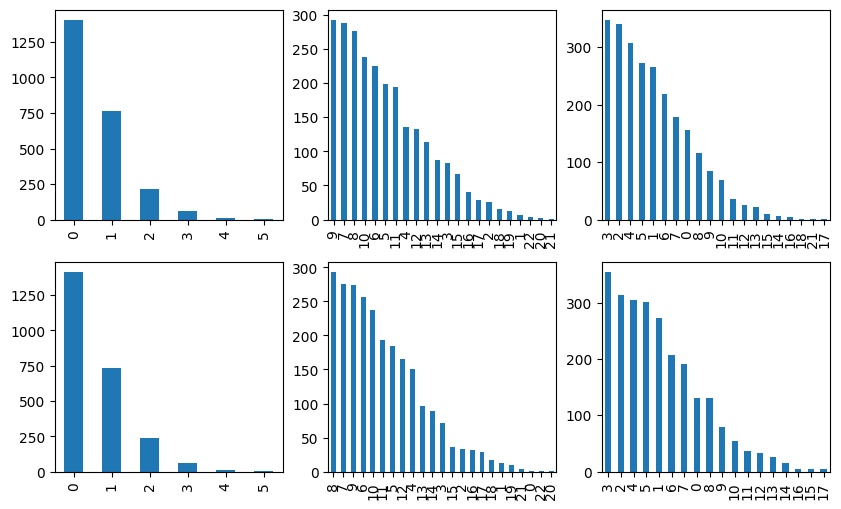

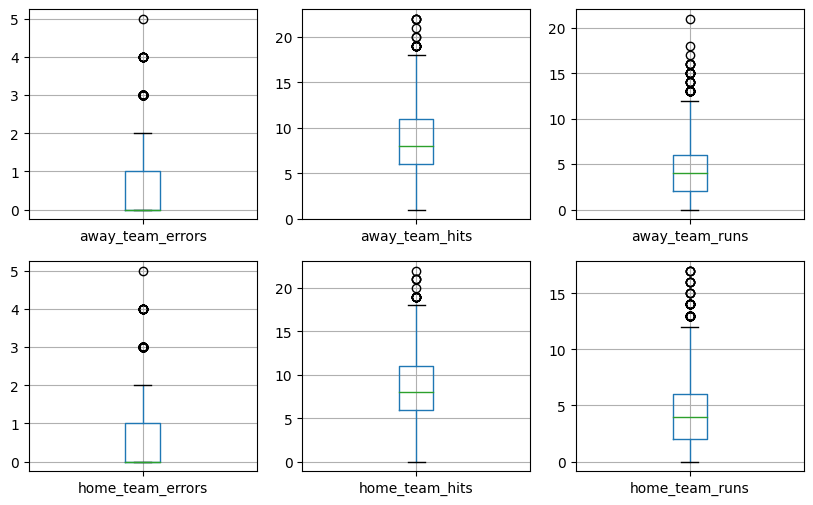

In [7]:
# graficos exploratorios de los tipos de variable away_team_errors	away_team_hits	away_team_runs	home_team_errors	home_team_hits	home_team_runs

plt.figure(figsize=(10, 6))

# grafico de barras
plt.subplot(2, 3, 1)
datos['away_team_errors'].value_counts().plot(kind='bar')

plt.subplot(2, 3, 2)
datos['away_team_hits'].value_counts().plot(kind='bar')

plt.subplot(2, 3, 3)
datos['away_team_runs'].value_counts().plot(kind='bar')

plt.subplot(2, 3, 4)
datos['home_team_errors'].value_counts().plot(kind='bar')

plt.subplot(2, 3, 5)
datos['home_team_hits'].value_counts().plot(kind='bar')

plt.subplot(2, 3, 6)
datos['home_team_runs'].value_counts().plot(kind='bar')
plt.show()

plt.figure(figsize=(10, 6))

# grafico de cajas
plt.subplot(2, 3, 1)
datos.boxplot(column='away_team_errors')

plt.subplot(2, 3, 2)
datos.boxplot(column='away_team_hits')

plt.subplot(2, 3, 3)
datos.boxplot(column='away_team_runs')

plt.subplot(2, 3, 4)
datos.boxplot(column='home_team_errors')

plt.subplot(2, 3, 5)
datos.boxplot(column='home_team_hits')

plt.subplot(2, 3, 6)
datos.boxplot(column='home_team_runs')
plt.show()



## Analisis de correlacion

In [8]:
# Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.

datos_num = datos.select_dtypes(include=[np.int64])
datos_cat = datos.select_dtypes(exclude=[np.int64])

datos_num.head()
datos_cat.head()

correlacion = datos_num.corr()
# analisis de correlacion entre las variables numericas y categoricas
correlacion
#print(correlacion)


,away_team_errors,away_team_hits,away_team_runs,home_team_errors,home_team_hits,home_team_runs
away_team_errors,1.000000,0.033057,0.042442,0.024280,0.153876,0.218470
away_team_hits,0.033057,1.000000,0.780760,0.190945,0.114150,0.052616
away_team_runs,0.042442,0.780760,1.000000,0.280002,0.091607,0.038996
home_team_errors,0.024280,0.190945,0.280002,1.000000,-0.007762,-0.008251
home_team_hits,0.153876,0.114150,0.091607,-0.007762,1.000000,0.769776
home_team_runs,0.218470,0.052616,0.038996,-0.008251,0.769776,1.000000


## Grafica de correlacion

<Figure size 1000x600 with 0 Axes>

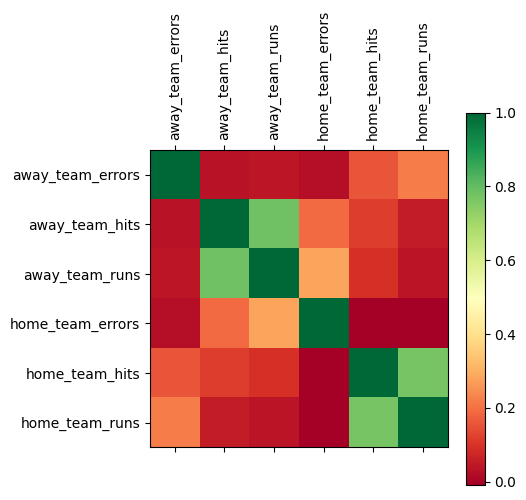

In [9]:
# grafico de correlacion
plt.figure(figsize=(10, 6))
plt.matshow(correlacion, cmap='RdYlGn')
plt.colorbar()
plt.xticks(range(len(correlacion.columns)), correlacion.columns, rotation=90)
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
plt.show()

## Variables categoricas

### Tabla de frecuencias

In [10]:
# tabla de frecuencia
tabla_frecuencia = datos_cat['home_team'].value_counts()
tabla_frecuencia

Cleveland Indians                89
Chicago Cubs                     89
Los Angeles Dodgers              86
Toronto Blue Jays                86
Washington Nationals             84
Texas Rangers                    83
San Francisco Giants             83
New York Mets                    82
Boston Red Sox                   82
Cincinnati Reds                  81
Chicago White Sox                81
St. Louis Cardinals              81
Colorado Rockies                 81
Houston Astros                   81
Minnesota Twins                  81
Kansas City Royals               81
Philadelphia Phillies            81
Seattle Mariners                 81
Milwaukee Brewers                81
New York Yankees                 81
Oakland Athletics                81
Pittsburgh Pirates               81
San Diego Padres                 81
Tampa Bay Rays                   81
Arizona Diamondbacks             81
Atlanta Braves                   81
Baltimore Orioles                81
Los Angeles Angels of Anahei

### Tabla de proporción

In [11]:
# tabla de proporcion
tabla_proporcion = datos_cat['home_team'].value_counts(normalize=True)
tabla_proporcion

Cleveland Indians                0.036135
Chicago Cubs                     0.036135
Los Angeles Dodgers              0.034917
Toronto Blue Jays                0.034917
Washington Nationals             0.034105
Texas Rangers                    0.033699
San Francisco Giants             0.033699
New York Mets                    0.033293
Boston Red Sox                   0.033293
Cincinnati Reds                  0.032887
Chicago White Sox                0.032887
St. Louis Cardinals              0.032887
Colorado Rockies                 0.032887
Houston Astros                   0.032887
Minnesota Twins                  0.032887
Kansas City Royals               0.032887
Philadelphia Phillies            0.032887
Seattle Mariners                 0.032887
Milwaukee Brewers                0.032887
New York Yankees                 0.032887
Oakland Athletics                0.032887
Pittsburgh Pirates               0.032887
San Diego Padres                 0.032887
Tampa Bay Rays                   0

### Grafica de barras

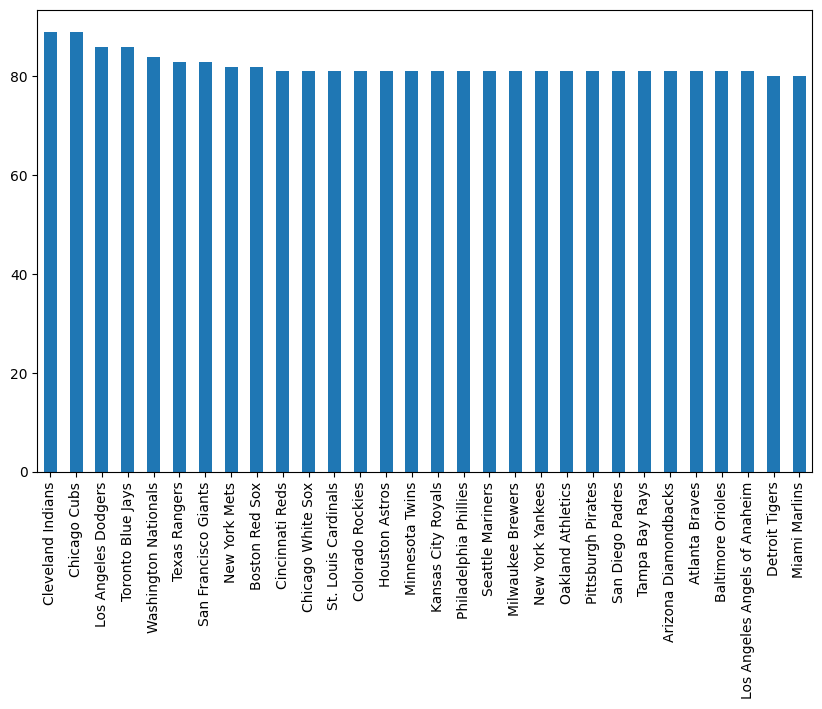

In [12]:
# grafico de barras
plt.figure(figsize=(10, 6))
datos_cat['home_team'].value_counts().plot(kind='bar')
plt.show()

# Limpieza de datos

### Eliminacion de field type

In [13]:
# eliminando columna field_type
datos = datos.drop('field_type', axis=1)
datos.head()

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,boxscore_url,date,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,other_info_string,start_time,venue
0,"40,030']",New York Mets,1,7,3,https://www.baseball-reference.com/boxes/KCA/K...,"Sunday, April 3, 2016",: 3:13,"Night Game, on grass",Kansas City Royals,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:38 p.m. Local,: Kauffman Stadium
1,"21,621']",Philadelphia Phillies,0,5,2,https://www.baseball-reference.com/boxes/CIN/C...,"Wednesday, April 6, 2016",: 2:23,"Night Game, on grass",Cincinnati Reds,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:11 p.m. Local,: Great American Ball Park
2,"12,622']",Minnesota Twins,0,5,2,https://www.baseball-reference.com/boxes/BAL/B...,"Wednesday, April 6, 2016",: 3:11,"Night Game, on grass",Baltimore Orioles,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:07 p.m. Local,: Oriole Park at Camden Yards
3,"18,531']",Washington Nationals,0,8,3,https://www.baseball-reference.com/boxes/ATL/A...,"Wednesday, April 6, 2016",: 2:53,"Night Game, on grass",Atlanta Braves,1,8,1,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:10 p.m. Local,: Turner Field
4,"18,572']",Colorado Rockies,1,8,4,https://www.baseball-reference.com/boxes/ARI/A...,"Wednesday, April 6, 2016",: 2:39,"Day Game, on grass",Arizona Diamondbacks,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 12:40 p.m. Local,: Chase Field


### Correccion de attendace

In [14]:
# Cada attendance tiene un valor pero seguido del valor tiene un '], quiero eliminar esto y que me convierta la columna a columna de ints
datos['attendance'] = datos['attendance'].str.replace(']', '')
datos['attendance'] = datos['attendance'].str.replace(",", '')
datos['attendance'] = datos['attendance'].str.replace("'", '')

# verificar en attendance que los valores sean de tipo int y los que no sean que se remplacen por la media
datos['attendance'] = pd.to_numeric(datos['attendance'], errors='coerce')
datos['attendance'] = datos['attendance'].fillna(datos['attendance'].mean())

datos.head()

C:\Users\rodas\AppData\Local\Temp\ipykernel_31544\1709065590.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datos['attendance'] = datos['attendance'].str.replace(']', '')


,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,boxscore_url,date,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,other_info_string,start_time,venue
0,40030.0,New York Mets,1,7,3,https://www.baseball-reference.com/boxes/KCA/K...,"Sunday, April 3, 2016",: 3:13,"Night Game, on grass",Kansas City Royals,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:38 p.m. Local,: Kauffman Stadium
1,21621.0,Philadelphia Phillies,0,5,2,https://www.baseball-reference.com/boxes/CIN/C...,"Wednesday, April 6, 2016",: 2:23,"Night Game, on grass",Cincinnati Reds,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:11 p.m. Local,: Great American Ball Park
2,12622.0,Minnesota Twins,0,5,2,https://www.baseball-reference.com/boxes/BAL/B...,"Wednesday, April 6, 2016",: 3:11,"Night Game, on grass",Baltimore Orioles,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:07 p.m. Local,: Oriole Park at Camden Yards
3,18531.0,Washington Nationals,0,8,3,https://www.baseball-reference.com/boxes/ATL/A...,"Wednesday, April 6, 2016",: 2:53,"Night Game, on grass",Atlanta Braves,1,8,1,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:10 p.m. Local,: Turner Field
4,18572.0,Colorado Rockies,1,8,4,https://www.baseball-reference.com/boxes/ARI/A...,"Wednesday, April 6, 2016",: 2:39,"Day Game, on grass",Arizona Diamondbacks,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 12:40 p.m. Local,: Chase Field


In [15]:
# verificar que todos los away_team_errors sean de tipo int y los que no sean que se remplacen por la media
datos['away_team_errors'] = pd.to_numeric(datos['away_team_errors'], errors='coerce')
datos['away_team_errors'] = datos['away_team_errors'].fillna(datos['away_team_errors'].mean())

# verificar que todos los away_team_hits sean de tipo int y los que no sean que se remplacen por la media
datos['away_team_hits'] = pd.to_numeric(datos['away_team_hits'], errors='coerce')
datos['away_team_hits'] = datos['away_team_hits'].fillna(datos['away_team_hits'].mean())

# verificar que todos los away_team_runs sean de tipo int y los que no sean que se remplacen por la media
datos['away_team_runs'] = pd.to_numeric(datos['away_team_runs'], errors='coerce')
datos['away_team_runs'] = datos['away_team_runs'].fillna(datos['away_team_runs'].mean())

# verificar que todos los home_team_errors sean de tipo int y los que no sean que se remplacen por la media
datos['home_team_errors'] = pd.to_numeric(datos['home_team_errors'], errors='coerce')
datos['home_team_errors'] = datos['home_team_errors'].fillna(datos['home_team_errors'].mean())

# verificar que todos los home_team_hits sean de tipo int y los que no sean que se remplacen por la media
datos['home_team_hits'] = pd.to_numeric(datos['home_team_hits'], errors='coerce')
datos['home_team_hits'] = datos['home_team_hits'].fillna(datos['home_team_hits'].mean())

# verificar que todos los home_team_runs sean de tipo int y los que no sean que se remplacen por la media
datos['home_team_runs'] = pd.to_numeric(datos['home_team_runs'], errors='coerce')
datos['home_team_runs'] = datos['home_team_runs'].fillna(datos['home_team_runs'].mean())

datos.head()

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,boxscore_url,date,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,other_info_string,start_time,venue
0,40030.0,New York Mets,1,7,3,https://www.baseball-reference.com/boxes/KCA/K...,"Sunday, April 3, 2016",: 3:13,"Night Game, on grass",Kansas City Royals,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:38 p.m. Local,: Kauffman Stadium
1,21621.0,Philadelphia Phillies,0,5,2,https://www.baseball-reference.com/boxes/CIN/C...,"Wednesday, April 6, 2016",: 2:23,"Night Game, on grass",Cincinnati Reds,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:11 p.m. Local,: Great American Ball Park
2,12622.0,Minnesota Twins,0,5,2,https://www.baseball-reference.com/boxes/BAL/B...,"Wednesday, April 6, 2016",: 3:11,"Night Game, on grass",Baltimore Orioles,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:07 p.m. Local,: Oriole Park at Camden Yards
3,18531.0,Washington Nationals,0,8,3,https://www.baseball-reference.com/boxes/ATL/A...,"Wednesday, April 6, 2016",: 2:53,"Night Game, on grass",Atlanta Braves,1,8,1,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:10 p.m. Local,: Turner Field
4,18572.0,Colorado Rockies,1,8,4,https://www.baseball-reference.com/boxes/ARI/A...,"Wednesday, April 6, 2016",: 2:39,"Day Game, on grass",Arizona Diamondbacks,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 12:40 p.m. Local,: Chase Field


# Regresiones

### Lineal

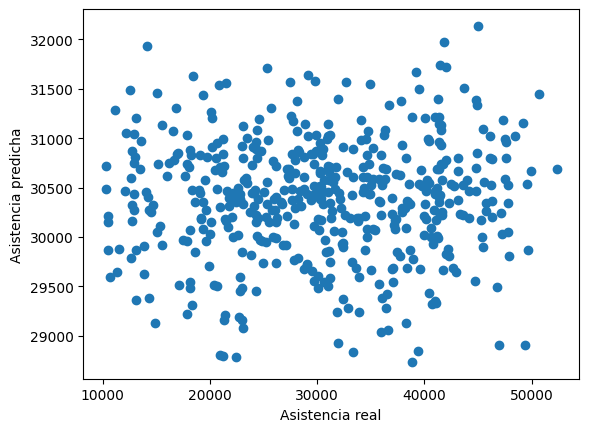

In [16]:
# regresion lineal para predecir el número de asistentes a un partido.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# seleccionar las variables independientes y dependientes
X = datos[['away_team_errors', 'away_team_hits', 'away_team_runs', 'home_team_errors', 'home_team_hits', 'home_team_runs']]
y = datos['attendance']

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# crear el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# predecir
y_pred = modelo.predict(X_test)

# grafico de dispersion
plt.scatter(y_test, y_pred)
plt.xlabel('Asistencia real')
plt.ylabel('Asistencia predicha')
plt.show()

In [17]:
# coeficientes de la regresion
print('Intercepto:', modelo.intercept_)
print('Coeficientes:', modelo.coef_)
print('R^2:', modelo.score(X_train, y_train))


Intercepto: 31055.09973219911
Coeficientes: [ 290.59388182  -31.17729173 -131.42183003   36.49957526  -67.37504408
  121.34805102]
R^2: 0.003892722829124451


### Lineal multiple

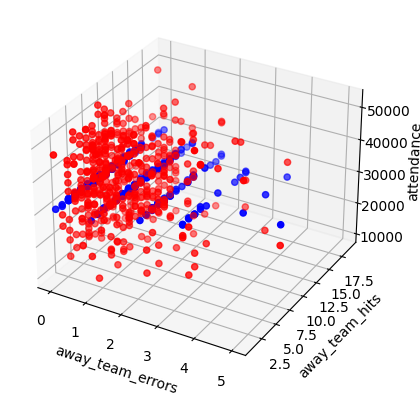

In [18]:
# Regresion lineal multiple grafica para predecir el número de asistentes a un partido.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['away_team_errors'], X_test['away_team_hits'], y_test, c='r', marker='o')
ax.scatter(X_test['away_team_errors'], X_test['away_team_hits'], y_pred, c='b', marker='o')

ax.set_xlabel('away_team_errors')
ax.set_ylabel('away_team_hits')
ax.set_zlabel('attendance')

plt.show()

In [19]:
# Regresion lineal multiple coeficientes
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

Mean squared error: 97177698.25438927
R^2: -0.00010486768457584894


### Polinomial

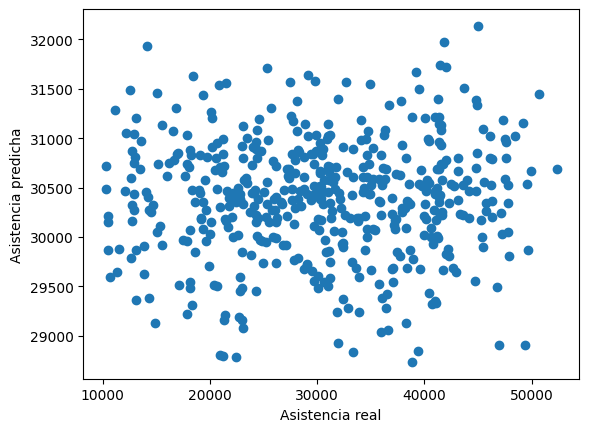

In [20]:
# Regresion lineal multiple para predecir el número de asistentes a un partido.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# seleccionar las variables independientes y dependientes
X = datos[['away_team_errors', 'away_team_hits', 'away_team_runs', 'home_team_errors', 'home_team_hits', 'home_team_runs']]
y = datos['attendance']

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# crear el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# predecir
y_pred = modelo.predict(X_test)

# grafico de dispersion
plt.scatter(y_test, y_pred)
plt.xlabel('Asistencia real')
plt.ylabel('Asistencia predicha')
plt.show()

In [21]:
# calcular coeficientes de la regresion
print('Intercepto:', modelo.intercept_)
print('Coeficientes:', modelo.coef_)
print('R^2:', modelo.score(X_train, y_train))

Intercepto: 31055.09973219911
Coeficientes: [ 290.59388182  -31.17729173 -131.42183003   36.49957526  -67.37504408
  121.34805102]
R^2: 0.003892722829124451


### SVR

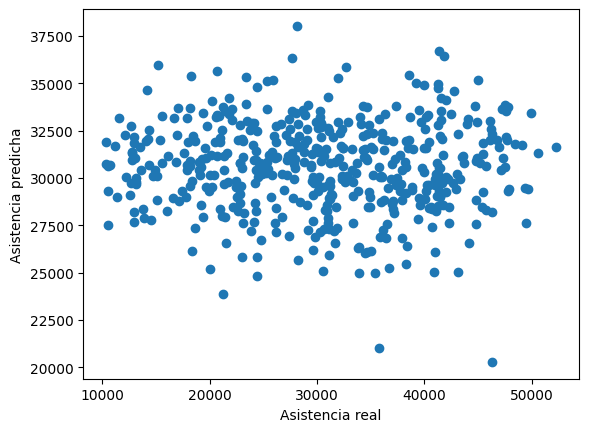

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# seleccionar las variables independientes y dependientes
X = datos[['away_team_errors', 'away_team_hits', 'away_team_runs', 'home_team_errors', 'home_team_hits', 'home_team_runs']]
y = datos['attendance']

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# escalar los datos
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1))

# crear el modelo
modelo = SVR(kernel='rbf')
modelo.fit(X_train_scaled, y_train_scaled.ravel())  # Ajustar el modelo con y_train_scaled

# predecir
y_pred_scaled = modelo.predict(X_test_scaled)

# revertir la escala de las predicciones
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# grafico de dispersion
plt.scatter(y_test, y_pred)
plt.xlabel('Asistencia real')
plt.ylabel('Asistencia predicha')
plt.show()



In [23]:
# coeficientes de regresion
print('R^2:', modelo.score(X_train_scaled, y_train_scaled))
print('R^2:', r2_score(y_test, y_pred))

R^2: 0.0674045968215824
R^2: -0.07118764814175305


### Arboles de decision

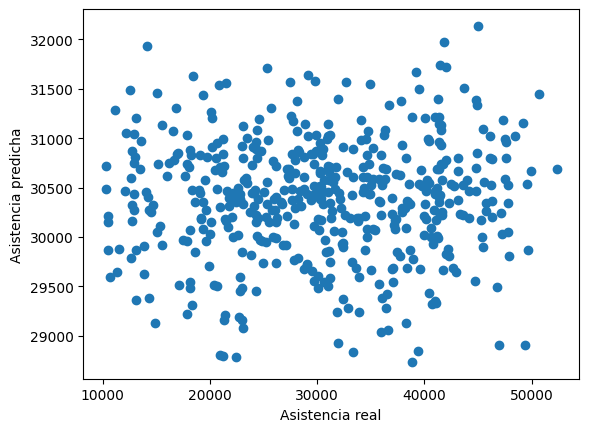

In [24]:
# Regresion lineal multiple para predecir el número de asistentes a un partido.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# seleccionar las variables independientes y dependientes
X = datos[['away_team_errors', 'away_team_hits', 'away_team_runs', 'home_team_errors', 'home_team_hits', 'home_team_runs']]
y = datos['attendance']

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# crear el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# predecir
y_pred = modelo.predict(X_test)

# grafico de dispersion
plt.scatter(y_test, y_pred)
plt.xlabel('Asistencia real')
plt.ylabel('Asistencia predicha')
plt.show()

In [25]:
# coeficientes de la regresion
print('Intercepto:', modelo.intercept_)
print('Coeficientes:', modelo.coef_)
print('R^2:', modelo.score(X_train, y_train))

Intercepto: 31055.09973219911
Coeficientes: [ 290.59388182  -31.17729173 -131.42183003   36.49957526  -67.37504408
  121.34805102]
R^2: 0.003892722829124451


### Random forest

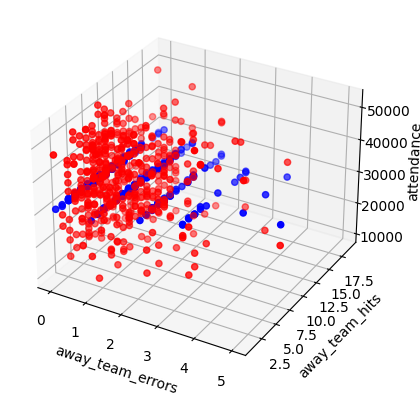

In [26]:
# Regresion lineal multiple coeficientes para predecir el número de asistentes a un partido. grafica
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['away_team_errors'], X_test['away_team_hits'], y_test, c='r', marker='o')
ax.scatter(X_test['away_team_errors'], X_test['away_team_hits'], y_pred, c='b', marker='o')

ax.set_xlabel('away_team_errors')
ax.set_ylabel('away_team_hits')
ax.set_zlabel('attendance')

plt.show()

In [27]:
# coeficientes de la regresion
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

Mean squared error: 97177698.25438927
R^2: -0.00010486768457584894


In [28]:
# Si es uno de los modelos lineales, obtenga las constantes del modelo y exprese la ecuación que representan
print('Intercepto:', modelo.intercept_)
print('Coeficientes:', modelo.coef_)
print('R^2:', modelo.score(X_train, y_train))



Intercepto: 31055.09973219911
Coeficientes: [ 290.59388182  -31.17729173 -131.42183003   36.49957526  -67.37504408
  121.34805102]
R^2: 0.003892722829124451


Ecuacion que representa:  y = 31055.09973219911 + 290.59388182x1 - 31.17729173x2 - 131.42183003x3 + 36.49957526x4 - 67.37504408x5 + 121.34805102x6


Esta ecuacion nos muestra una ecuación de regresión lineal múltiple que relaciona una variable dependiente y con 6 variables independientes, tambien nos indica que se obtiene una 0.39% de la variacion de y

La ecuacion explica que el salario de un jugador de futbol se puede explicar por el valor de su edad, su valor de mercado, su valor de salario, su valor de clausula, su valor de goles y su valor de asistencias.

Esta interesado en predecir cuál será la asistencia a un partido en el que se
enfrenten X y Y equipos (Ud decide cuáles), así como el día de la semana, la hora
y el estadio (también los decide Ud) y otras variables que exija su modelo. Para
estos valores, ¿cuál es la predicción de la asistencia?

Para este caso se utilizara el modelo de regresion lineal multiple para predecir la asistencia a un partido de futbol, este se obtuvo en el analisis exploratorio de datos.